In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import dmatrices
import seaborn as sns
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
sns.set(color_codes=True)

In [2]:
data= pd.read_csv("./Datos_ini_Clima_Soil_consolidado.csv")
data.head()

,municipio,lote,Height,Northing,Easting,colletotri,gota,virosis,edad_culti,Cantidad_s,...,nitrogeno5,arena5_15,ph15_30,ph0_5,da0_5,arena15_30,da5_15,arena0_5,arcilla0_5,limo5_15
0,Donmatias,1,2288.201,717030.517,459515.419,0.60,0.60,0.50,na,5.0,...,573,352,5.1,5.1,89,353,90,358,277,362
1,Donmatias,2,2452.037,714018.113,454618.621,0.20,0.23,0.00,18,3.5,...,646,358,5.2,5.1,76,358,80,366,318,318
2,Donmatias,3,2308.196,716885.319,459501.413,0.03,0.10,0.20,12,2.0,...,581,348,5.2,5.2,85,341,86,356,311,330
3,sonson,1,2406.238,637058.913,469659.433,0.33,0.23,0.33,22,1.0,...,606,364,5.2,5.2,77,362,80,365,310,321
4,sonson,2,2529.183,636056.898,466976.021,0.43,0.17,0.43,14,1.2,...,603,355,5.3,5.3,73,355,76,358,300,339


In [3]:
del_cols = ['lote','colletotri', 'gota','Frecuencia', 'poda_fitos','Frecuenc_1', 'Frecuenc_2', 'municipio','Cantidad_s','Venta','problema_c','capacitaci','Rotacion','Cultivo_pr','Topografí','Distancia_','Variedad','Procedenci','Asistencia','Diagnostic','erradicaci','desinfecci','Quema_ente','Diagnost_1','Desinfec_1','producto_b','Analisis_s','Tipo_ferti','Experienci','edad_culti']

In [4]:
data_clean = data.copy()

In [5]:
data_clean.drop(del_cols, inplace=True, axis=1)

In [6]:
data_clean.head()
data_clean.fillna(0)

,Height,Northing,Easting,virosis,Productivi,msnm,Wvapr_05,Wwind_02,Precip_10,Wwind_10,...,nitrogeno5,arena5_15,ph15_30,ph0_5,da0_5,arena15_30,da5_15,arena0_5,arcilla0_5,limo5_15
0,2288.201,717030.517,459515.419,0.50,48.5,2288.201,1.51,1.1,276,0.9,...,573,352,5.1,5.1,89,353,90,358,277,362
1,2452.037,714018.113,454618.621,0.00,30.0,2308.196,1.48,1.1,303,0.9,...,646,358,5.2,5.1,76,358,80,366,318,318
2,2308.196,716885.319,459501.413,0.20,15.0,2452.037,1.51,1.1,276,0.9,...,581,348,5.2,5.2,85,341,86,356,311,330
3,2406.238,637058.913,469659.433,0.33,18.0,2406.238,1.46,1.0,279,0.9,...,606,364,5.2,5.2,77,362,80,365,310,321
4,2529.183,636056.898,466976.021,0.43,12.0,2529.183,1.40,1.0,257,0.9,...,603,355,5.3,5.3,73,355,76,358,300,339
5,2384.077,628690.718,465421.649,0.40,10.0,2384.077,1.47,1.0,281,0.9,...,607,326,5.4,5.4,81,310,85,333,276,396
6,2573.498,713591.531,440720.035,0.30,50.0,2573.498,1.40,1.1,268,0.9,...,578,365,5.0,5.0,79,360,83,372,299,339
7,2505.224,716753.763,438594.103,0.63,45.0,2505.224,1.38,1.2,286,1.0,...,570,343,5.2,5.3,81,337,83,342,331,323
8,2464.765,717878.333,437352.067,0.17,18.0,2464.765,1.44,1.1,299,0.9,...,524,327,5.2,5.2,83,315,86,331,300,374
9,2176.542,690721.246,459348.477,0.33,14.0,2176.542,1.60,1.0,271,0.9,...,443,326,5.4,5.4,88,330,89,335,302,360


In [ ]:
#i=0
#for col, tipo in zip(data_clean.columns, data_clean.dtypes):
    #print(i, ' ',col, ': ', tipo)
    #print(i, ':',col,',')
    #print(col)
    #i+=1

In [7]:
ds = data_clean.index.to_series()

#Create the training and testing data sets
mask = np.random.rand(len(data_clean)) < 0.7

data_clean_train = data_clean[mask]
data_clean_test = data_clean[~mask]
print('Training data set length='+str(len(data_clean_train)))
print('Testing data set length='+str(len(data_clean_test)))

Training data set length=16
Testing data set length=7


In [8]:
data_clean_train

,Height,Northing,Easting,virosis,Productivi,msnm,Wvapr_05,Wwind_02,Precip_10,Wwind_10,...,nitrogeno5,arena5_15,ph15_30,ph0_5,da0_5,arena15_30,da5_15,arena0_5,arcilla0_5,limo5_15
0,2288.201,717030.517,459515.419,0.50,48.5,2288.201,1.51,1.1,276,0.9,...,573,352,5.1,5.1,89,353,90,358,277,362
1,2452.037,714018.113,454618.621,0.00,30.0,2308.196,1.48,1.1,303,0.9,...,646,358,5.2,5.1,76,358,80,366,318,318
3,2406.238,637058.913,469659.433,0.33,18.0,2406.238,1.46,1.0,279,0.9,...,606,364,5.2,5.2,77,362,80,365,310,321
5,2384.077,628690.718,465421.649,0.40,10.0,2384.077,1.47,1.0,281,0.9,...,607,326,5.4,5.4,81,310,85,333,276,396
6,2573.498,713591.531,440720.035,0.30,50.0,2573.498,1.40,1.1,268,0.9,...,578,365,5.0,5.0,79,360,83,372,299,339
7,2505.224,716753.763,438594.103,0.63,45.0,2505.224,1.38,1.2,286,1.0,...,570,343,5.2,5.3,81,337,83,342,331,323
8,2464.765,717878.333,437352.067,0.17,18.0,2464.765,1.44,1.1,299,0.9,...,524,327,5.2,5.2,83,315,86,331,300,374
10,2163.020,690776.904,459148.437,0.43,18.0,2163.020,1.60,1.0,271,0.9,...,443,326,5.4,5.4,88,330,89,335,302,360
13,2265.774,619232.118,412345.447,0.27,28.0,2265.774,1.49,1.0,398,0.9,...,648,339,5.3,5.3,80,343,83,342,287,372
14,2211.447,618742.288,412242.761,0.20,40.0,2211.447,1.61,1.0,242,0.8,...,565,375,5.2,5.2,82,363,87,382,295,320


In [9]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """virosis ~ Height + Northing + Easting + Productivi + msnm + Wvapr_05 + Wwind_02 + Precip_10 + Wwind_10 + Wtavg_12 + Wvapr_07 + Wwind_01 + Precip_06 + Precip_08 + Wtavg_09 + Wvapr_08 + Precip_02 + Wwind_07 + Wtavg_03 + Wvapr_04 + Wsrad_09 + Wwind_05 + Wvapr_03 + Precip_01 + Wtavg_05 + Precip_07 + Wwind_04 + Precip_12 + Precip_03 + Wsrad_08 + Wwind_11 + Welev + Wsrad_04 + Wvapr_12 + Wsrad_01 + Wwind_08 + Wvapr_02 + Wsrad_03 + Wwind_06 + Wtavg_04 + Wtavg_06 + Wsrad_07 + Precip_04 + Precip_11 + Wwind_09 + Wvapr_10 + Wsrad_02 + Wvapr_06 + Wsrad_12 + Wtavg_08 + Wvapr_09 + Wtavg_10 + Wtavg_07 + Wtavg_01 + Precip_05 + Wtavg_11 + Wwind_12 + Wtavg_02 + Wsrad_10 + Wsrad_05 + Precip_09 + Wsrad_11 + Wvapr_01 + Wsrad_06 + Wvapr_11 + Wwind_03 + nitrogeno + nitrogeno1 + limo15_30 + limo0_5 + da15_30 + arcillas15 + arcilla5_1 + ph5_15 + nitrogeno5 + arena5_15 + ph15_30 + ph0_5 + da0_5 + arena15_30 + da5_15 + arena0_5 + arcilla0_5 + limo5_15"""

In [10]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr, data_clean_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_clean_test, return_type='dataframe')

In [12]:
X_train

,Intercept,Height,Northing,Easting,Productivi,msnm,Wvapr_05,Wwind_02,Precip_10,Wwind_10,...,nitrogeno5,arena5_15,ph15_30,ph0_5,da0_5,arena15_30,da5_15,arena0_5,arcilla0_5,limo5_15
0,1.0,2288.201,717030.517,459515.419,48.5,2288.201,1.51,1.1,276.0,0.9,...,573.0,352.0,5.1,5.1,89.0,353.0,90.0,358.0,277.0,362.0
1,1.0,2452.037,714018.113,454618.621,30.0,2308.196,1.48,1.1,303.0,0.9,...,646.0,358.0,5.2,5.1,76.0,358.0,80.0,366.0,318.0,318.0
3,1.0,2406.238,637058.913,469659.433,18.0,2406.238,1.46,1.0,279.0,0.9,...,606.0,364.0,5.2,5.2,77.0,362.0,80.0,365.0,310.0,321.0
5,1.0,2384.077,628690.718,465421.649,10.0,2384.077,1.47,1.0,281.0,0.9,...,607.0,326.0,5.4,5.4,81.0,310.0,85.0,333.0,276.0,396.0
6,1.0,2573.498,713591.531,440720.035,50.0,2573.498,1.40,1.1,268.0,0.9,...,578.0,365.0,5.0,5.0,79.0,360.0,83.0,372.0,299.0,339.0
7,1.0,2505.224,716753.763,438594.103,45.0,2505.224,1.38,1.2,286.0,1.0,...,570.0,343.0,5.2,5.3,81.0,337.0,83.0,342.0,331.0,323.0
8,1.0,2464.765,717878.333,437352.067,18.0,2464.765,1.44,1.1,299.0,0.9,...,524.0,327.0,5.2,5.2,83.0,315.0,86.0,331.0,300.0,374.0
10,1.0,2163.020,690776.904,459148.437,18.0,2163.020,1.60,1.0,271.0,0.9,...,443.0,326.0,5.4,5.4,88.0,330.0,89.0,335.0,302.0,360.0
13,1.0,2265.774,619232.118,412345.447,28.0,2265.774,1.49,1.0,398.0,0.9,...,648.0,339.0,5.3,5.3,80.0,343.0,83.0,342.0,287.0,372.0
14,1.0,2211.447,618742.288,412242.761,40.0,2211.447,1.61,1.0,242.0,0.8,...,565.0,375.0,5.2,5.2,82.0,363.0,87.0,382.0,295.0,320.0


In [ ]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
#poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Random Forest

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
regr.feature_importances_

array([0.        , 0.        , 0.01619156, 0.04797484, 0.02544432,
       0.00142978, 0.00348583, 0.        , 0.01676514, 0.        ,
       0.00494684, 0.00032784, 0.        , 0.01134937, 0.02687552,
       0.00304102, 0.00067432, 0.00115321, 0.00815457, 0.00145713,
       0.        , 0.06369228, 0.00076761, 0.00495385, 0.        ,
       0.0027248 , 0.08992019, 0.        , 0.00537879, 0.10192286,
       0.00192408, 0.        , 0.01066742, 0.02804432, 0.        ,
       0.01889087, 0.        , 0.00382118, 0.02502061, 0.00029685,
       0.00404086, 0.00225112, 0.00496109, 0.01449148, 0.02932429,
       0.00099885, 0.00651083, 0.00741851, 0.00305758, 0.12664275,
       0.        , 0.        , 0.01147804, 0.00424958, 0.0024868 ,
       0.00742823, 0.00780682, 0.        , 0.0002571 , 0.        ,
       0.00115353, 0.02999617, 0.05710118, 0.        , 0.01055348,
       0.00645045, 0.00271358, 0.00317766, 0.01280773, 0.00376934,
       0.01027155, 0.00353346, 0.00144722, 0.01814861, 0.00096

In [ ]:
def plot_rf_importances(forest, X, y, dic_etiquetas):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    

    # Print the feature ranking
    print("Feature ranking:")
    #print(indices.tolist())
    names_xlabel = []
    for ind in indices.tolist():
        et = dic_etiquetas[ind]
        names_xlabel.append(et)
        
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=(30,20), dpi=200)
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="#48BAD8", align="center")
    plt.xticks(range(X.shape[1]), names_xlabel, rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel("Feature band ID")
    plt.ylabel("Importance")
    plt.show()
    
    return indices

In [ ]:
# Tomo del conjunto de entremaniento los nombres de las columnas para luego poder incluirlos en el grafico
labels_obj = X_train.columns
labels_obj[6]

'Wvapr_05'

Feature ranking:
1. feature 49 (0.126643)
2. feature 29 (0.101923)
3. feature 26 (0.089920)
4. feature 21 (0.063692)
5. feature 62 (0.057101)
6. feature 3 (0.047975)
7. feature 61 (0.029996)
8. feature 44 (0.029324)
9. feature 33 (0.028044)
10. feature 82 (0.027356)
11. feature 14 (0.026876)
12. feature 4 (0.025444)
13. feature 38 (0.025021)
14. feature 35 (0.018891)
15. feature 73 (0.018149)
16. feature 80 (0.017898)
17. feature 8 (0.016765)
18. feature 2 (0.016192)
19. feature 43 (0.014491)
20. feature 68 (0.012808)
21. feature 76 (0.011747)
22. feature 52 (0.011478)
23. feature 13 (0.011349)
24. feature 32 (0.010667)
25. feature 64 (0.010553)
26. feature 70 (0.010272)
27. feature 78 (0.008465)
28. feature 18 (0.008155)
29. feature 56 (0.007807)
30. feature 55 (0.007428)
31. feature 47 (0.007419)
32. feature 46 (0.006511)
33. feature 65 (0.006450)
34. feature 83 (0.006003)
35. feature 28 (0.005379)
36. feature 42 (0.004961)
37. feature 23 (0.004954)
38. feature 10 (0.004947)
39. feat

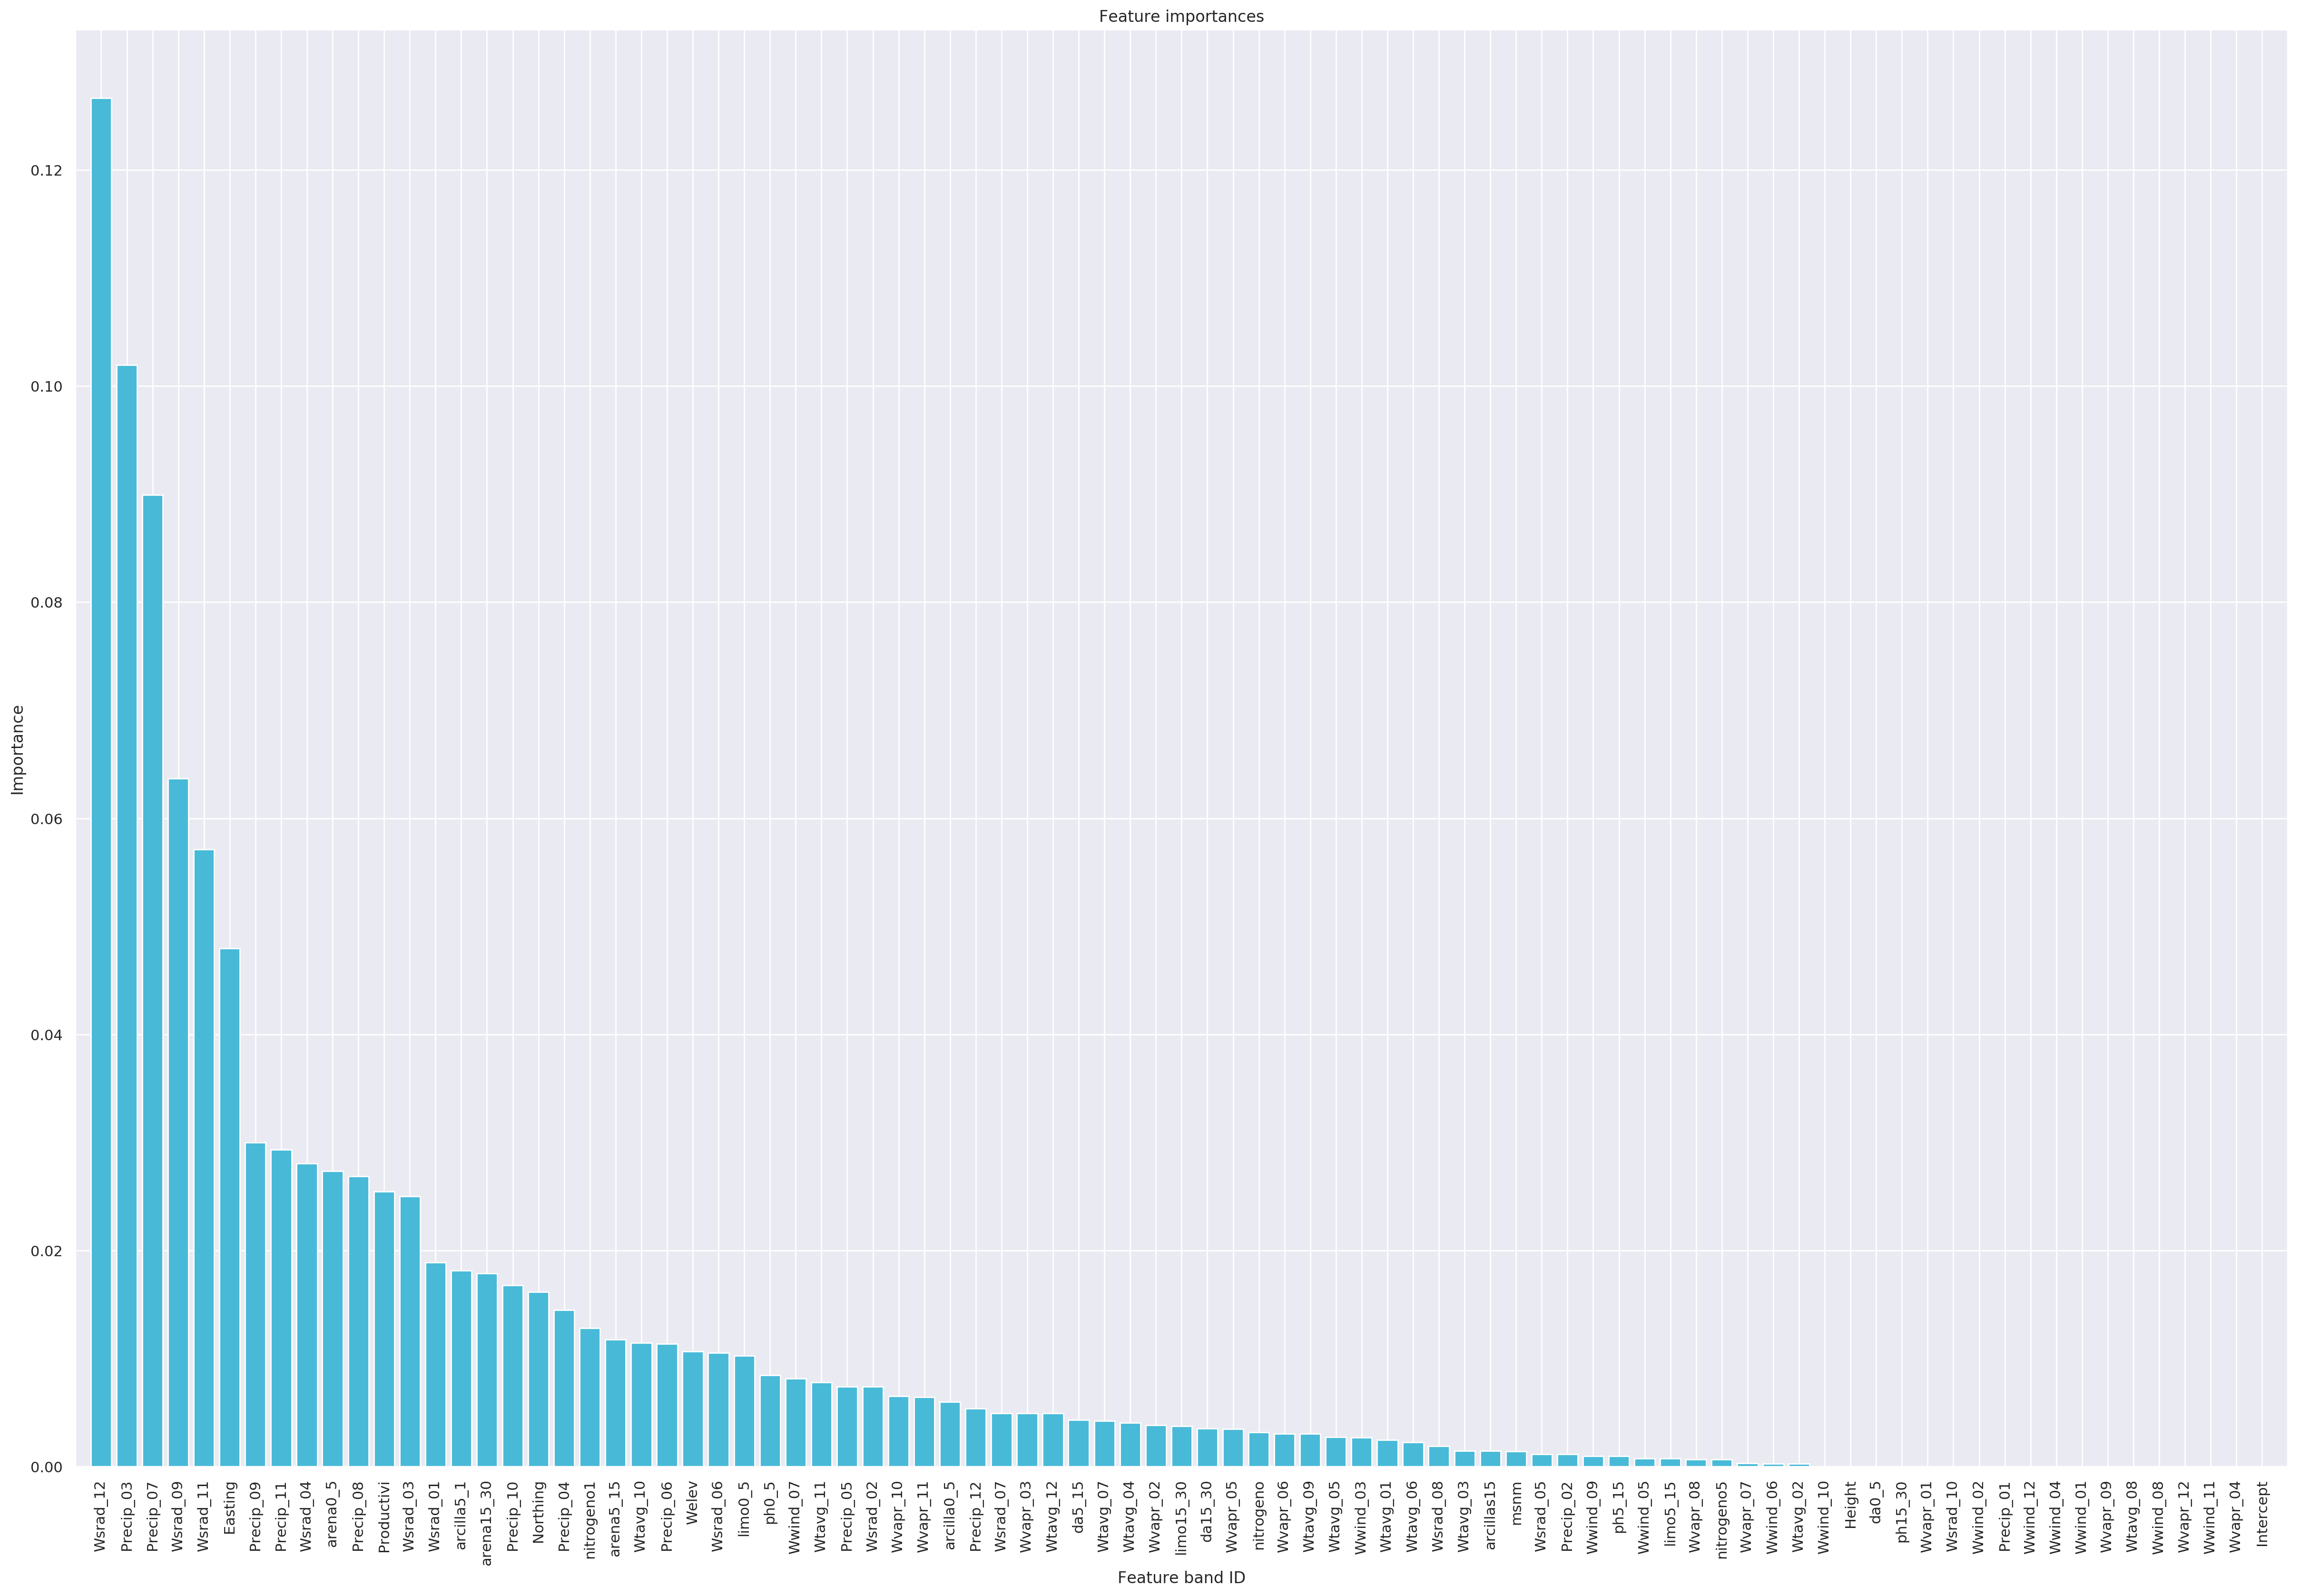

In [ ]:
#etiquetas = ['Height','Northing','Easting','Productivi','msnm','Wvapr_05','Wwind_02','Precip_10','Wwind_10','Wtavg_12','Wvapr_07','Wwind_01','Precip_06','Precip_08','Wtavg_09','Wvapr_08','Precip_02','Wwind_07','Wtavg_03','Wvapr_04','Wsrad_09','Wwind_05','Wvapr_03','Precip_01','Wtavg_05','Precip_07','Wwind_04','Precip_12','Precip_03','Wsrad_08','Wwind_11','Welev','Wsrad_04','Wvapr_12','Wsrad_01','Wwind_08','Wvapr_02','Wsrad_03','Wwind_06','Wtavg_04','Wtavg_06','Wsrad_07','Precip_04','Precip_11','Wwind_09','Wvapr_10','Wsrad_02','Wvapr_06','Wsrad_12','Wtavg_08','Wvapr_09','Wtavg_10','Wtavg_07','Wtavg_01','Precip_05','Wtavg_11','Wwind_12','Wtavg_02','Wsrad_10','Wsrad_05','Precip_09','Wsrad_11','Wvapr_01','Wsrad_06','Wvapr_11','Wwind_03','nitrogeno','nitrogeno1','limo15_30','limo0_5','da15_30','arcillas15','arcilla5_1','ph5_15','nitrogeno5','arena5_15','ph15_30','ph0_5','da0_5','arena15_30','da5_15','arena0_5','arcilla0_5','limo5_15']
indices = plot_rf_importances(regr, X_train, y_train,labels_obj)

# Modelo Lineal Generalizado usando las variables encontradas con RF

In [ ]:
data_imp_rf = data_clean[['virosis', 'Wsrad_12', 'Precip_03','Precip_07']].copy()
data_imp_rf.head()

,virosis,Wsrad_12,Precip_03,Precip_07
0,0.50,16348,137,216
1,0.00,16171,223,236
2,0.20,16348,137,216
3,0.33,17147,157,202
4,0.43,16431,142,182


In [ ]:
ds = data_imp_rf.index.to_series()

#Create the training and testing data sets.
mask = np.random.rand(len(data_imp_rf)) < 0.5

data_imp_rf_train = data_imp_rf[mask]
data_imp_rf_test = data_imp_rf[~mask]
print('Training data set length='+str(len(data_imp_rf_train)))
print('Testing data set length='+str(len(data_imp_rf_test)))

Training data set length=12
Testing data set length=11


In [ ]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """virosis ~ Wsrad_12 + Precip_03 + Precip_07"""

In [ ]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr, data_imp_rf_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, data_imp_rf_test, return_type='dataframe')

In [ ]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [ ]:
#Print the training summary.
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                virosis   No. Observations:                   12
Model:                            GLM   Df Residuals:                        8
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.6210
Date:                Thu, 11 Feb 2021   Deviance:                      0.58220
Time:                        11:02:14   Pearson chi2:                    0.484
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7932     25.334     -0.466      0.6

        mean   mean_se  mean_ci_lower  mean_ci_upper
2   0.300703  0.318602       0.037694       2.398863
3   0.395752  0.351230       0.069500       2.253536
4   0.266818  0.185609       0.068247       1.043145
6   0.509927  0.581159       0.054626       4.760087
11  0.463581  0.380571       0.092756       2.316906
13  0.168439  0.329687       0.003634       7.807491
14  0.082448  0.203625       0.000652      10.433584
15  0.123799  0.180837       0.007069       2.168181
16  0.483436  0.385149       0.101437       2.304003
18  0.488595  0.452638       0.079504       3.002682
22  0.412580  0.468781       0.044500       3.825240


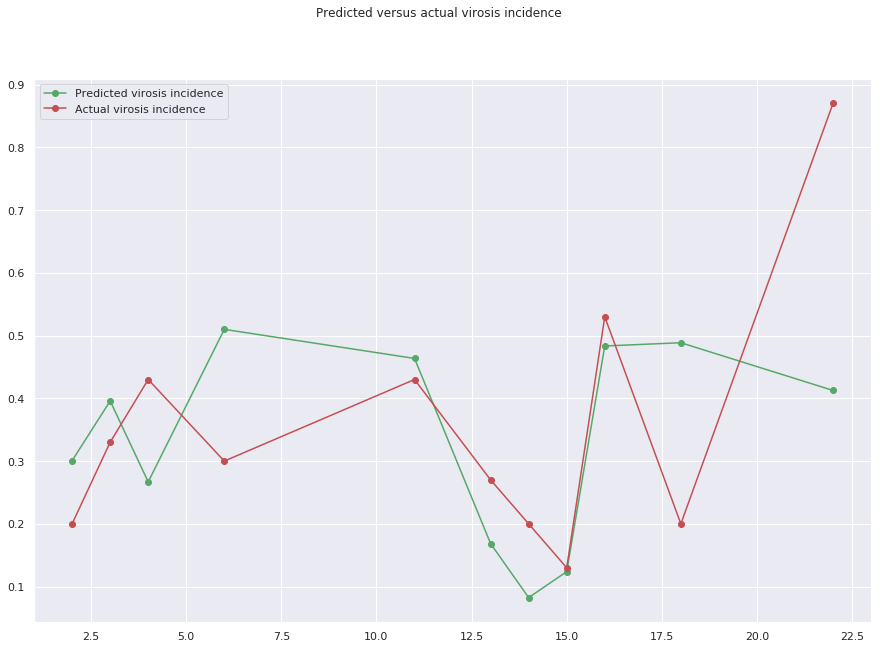

<Figure size 432x288 with 0 Axes>

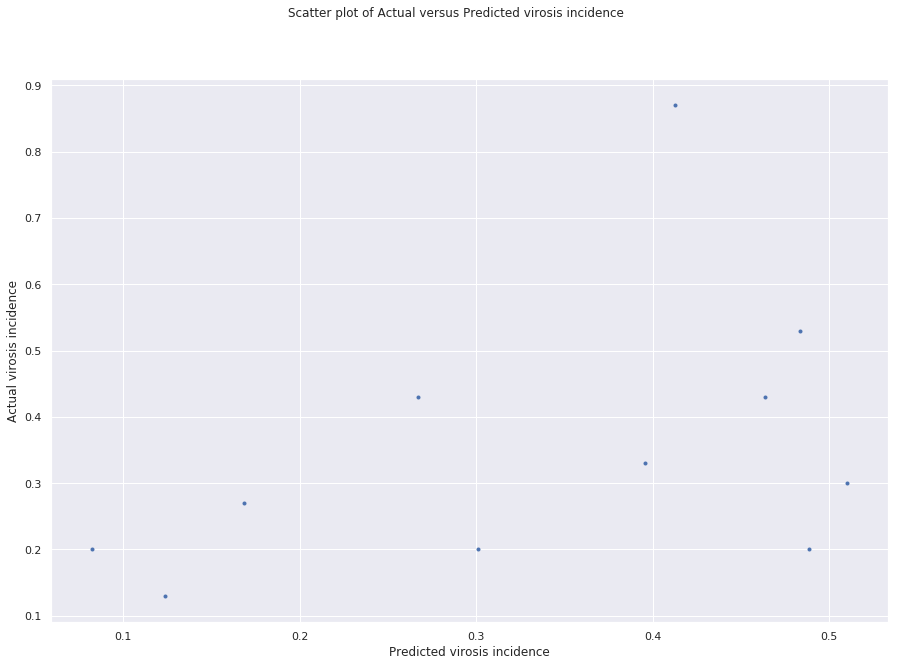

In [ ]:
#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['virosis']

#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure(figsize=(15,10))
fig.suptitle('Predicted versus actual virosis incidence')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted virosis incidence')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual virosis incidence')
plt.legend(handles=[predicted, actual])
plt.show()

#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure(figsize=(15,10))
fig.suptitle('Scatter plot of Actual versus Predicted virosis incidence')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted virosis incidence')
plt.ylabel('Actual virosis incidence')
plt.show()